In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dynamic_routing_analysis import decoding_utils, plot_utils

In [2]:
path_0=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_20_units\combined\all_unit_linear_shift_use_more_trials.csv"
DR_run_0 = pd.read_csv(path_0)

path_1=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_20_units_re_run\combined\all_unit_linear_shift_use_more_trials.csv"
DR_run_1 = pd.read_csv(path_1)

In [4]:
all_frac_sig_df_0,all_diff_from_null_df_0=decoding_utils.compute_significant_decoding_by_area(DR_run_0)
all_frac_sig_df_1,all_diff_from_null_df_1=decoding_utils.compute_significant_decoding_by_area(DR_run_1)

In [10]:
# all_diff_from_null_df_0

In [12]:
#merge 0 and 1 on session id

all_diff_from_null_df=pd.merge(all_diff_from_null_df_0,all_diff_from_null_df_1,on='area',suffixes=('_0','_1'))
all_diff_from_null_df.columns

Index(['area', 'diff_from_null_mean_DR_0', 'diff_from_null_median_DR_0',
       'true_accuracy_DR_0', 'null_median_DR_0', 'n_expts_DR_0',
       'diff_from_null_mean_Templ_0', 'diff_from_null_median_Templ_0',
       'true_accuracy_Templ_0', 'null_median_Templ_0', 'n_expts_Templ_0',
       'diff_from_null_mean_DR_1', 'diff_from_null_median_DR_1',
       'true_accuracy_DR_1', 'null_median_DR_1', 'n_expts_DR_1',
       'diff_from_null_mean_Templ_1', 'diff_from_null_median_Templ_1',
       'true_accuracy_Templ_1', 'null_median_Templ_1', 'n_expts_Templ_1'],
      dtype='object')

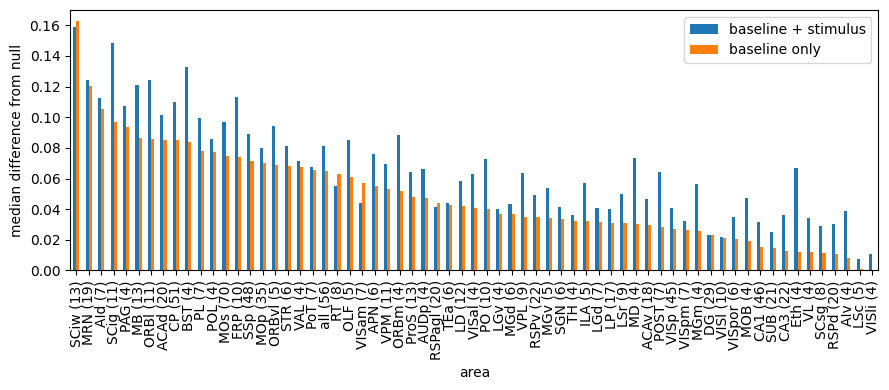

In [19]:
#barplot sorted by DR diff from median
min_n_expts=4

plot_DR_diff_from_null_df=all_diff_from_null_df.query('n_expts_DR_1>=@min_n_expts').sort_values('diff_from_null_median_DR_1',ascending=False)
fig,ax=plt.subplots(1,1,figsize=(9,4))
plot_DR_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median_DR_0','diff_from_null_median_DR_1'],ax=ax)

ax.set_ylabel('median difference from null')
area_labels=[]
for i in range(plot_DR_diff_from_null_df.shape[0]):
    area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts_DR_1'].iloc[i]))+')')
ax.set_xticklabels(area_labels,rotation=90,ha='center')

ax.set_ylim([0,0.17])
ax.legend(['baseline + stimulus','baseline only'])
fig.tight_layout()



In [2]:
import pickle

In [3]:
file=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_20_units_plus_all\713655_2024-08-08_decoding_results_linear_shift_20_units_plus_all.pkl"
output = pickle.load(open(file, "rb"))

In [4]:
output.keys()

dict_keys(['713655_2024-08-08'])

In [5]:
output['713655_2024-08-08'].keys()

dict_keys(['shifts', 'middle_4_blocks', 'spikes_binsize', 'spikes_time_before', 'spikes_time_after', 'input_data_type', 'n_units', 'n_repeats', 'session_info', 'trial_cache_path', 'unit_cache_path', 'trials', 'results', 'areas'])

In [6]:
output['713655_2024-08-08']['results'].keys()

dict_keys(['AD', 'AMd', 'AV', 'CA1', 'CEAm', 'CP', 'DG', 'Eth', 'GPe', 'HY', 'PO', 'POL', 'ProS', 'SSp_probeB', 'SSp_probeF', 'SSs', 'SUB_probeC', 'SUB_probeD', 'TEa', 'VAL', 'VISl', 'VISpm', 'VM', 'ZI', 'out of brain_probeD', 'all'])

In [8]:
output['713655_2024-08-08']['n_units']

[20, 'all']

In [21]:
shifts=output['713655_2024-08-08']['shifts']
zero_shift=np.where(shifts==0)[0][0]
zero_shift

45

In [28]:
output['713655_2024-08-08']['results']['all']['shift'][20][0][zero_shift]['balanced_accuracy']

0.7023467432950192

In [29]:
output['713655_2024-08-08']['results']['all']['shift']['all'][0][zero_shift]['balanced_accuracy']

0.9442049808429118